In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# CPSC 330 - Applied Machine Learning 

## Homework 6: Clustering
### Associated lectures: Lectures 15 and 16

**Due date: Check the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**

## Imports <a name="im"></a>

In [2]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Submission instructions
<hr>
rubric={points:6}

**Please be aware that this homework assignment requires installation of several packages in your course environment. It's possible that you'll encounter installation challenges, which might be frustrating. However, remember that solving these issues is not wasting time but it is an essential skill for anyone aspiring to work in data science or machine learning.**

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/docs/homework_instructions.md). 

**You may work in a group on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb. If the pdf or html also fail to render on Gradescope, please create two files for your homework: hw6a.ipynb with Exercise 1 and hw6b.ipynb with Exercises 2 and 3 and submit these two files in your submission.  
</div>

_Points:_ 6

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: Document clustering warm-up
<hr>

In this homework, we will explore a popular application of clustering called [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A, tweets), and clustering is a commonly used technique to organize this data in a meaningful way. 

As a warm up, in this exercise you will cluster sentences from a toy corpus. Later in the homework you will work with a real corpus. 

The code below extracts introductory sentences of Wikipedia articles on a set of queries. To run the code successfully, you will need the `wikipedia` package installed in the course environment. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```


**Your tasks:**

Run the code below which 
- extracts content of Wikipedia articles on a set of queries
- tokenizes the text (i.e., separates sentences) and 
- stores the 2nd sentence in each article as a document representing that article

> Feel free to experiment with Wikipedia queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs to grade your submission.

> For tokenization we are using the `nltk` package. If you do not have this package in the course environment, you will have to install it.

```
conda activate cpsc330
conda install -c anaconda nltk
```

Even if you have the package installed via the course `conda` environment, you might have to download `nltk` pre-trained models, which can be done with the code below.

In [3]:
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/justingoh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/justingoh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
import wikipedia
from nltk.tokenize import sent_tokenize, word_tokenize

queries = [
    "baguette food",
    "banana bread food",
    "bread food",
    "data science",
    "sports analytics",
    "football sport",
    "ice hockey",
]

wiki_dict = {"wiki query": [], "text": [], "n_words": []}
for i in range(len(queries)):
    text = sent_tokenize(wikipedia.page(queries[i]).content)[1]
    wiki_dict["text"].append(text)
    wiki_dict["n_words"].append(len(word_tokenize(text)))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,baguette food,"In 1986, it was established as a subsidiary of Shani Co., Ltd., and opened the first 'Paris Baguette' in Gwanghwamun, Seoul, and the first high-end bakery 'Paris Croissant' in Itaewon the following year, and the corporate name changed to the same as the brand name.",54
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17
6,ice hockey,It belongs to a family of sports called hockey.,10


Our toy corpus has six toy documents (`text` column in the dataframe) extracted from Wikipedia queries. 

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters? 
rubric={points}


**Your tasks:**

1. If you are asked to cluster the documents from this toy corpus manually, how many clusters would you identify and how would you label each cluster?   

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

I would use 3 clusters.
Cluster 1: Food
Cluster 2: Science and Analytics
Cluster 3: Sports

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 `KMeans` with bag-of-words representation 
rubric={points}

In the lecture, we saw that data representation plays a crucial role in clustering. Changing flattened representation of images to feature vectors extracted from pre-trained models greatly improved the quality of clustering. 

What kind of representation is suitable for text data? We have used bag-of-words representation to numerically encode text data before, where each document is represented with a vector of word frequencies. 

Let's try clustering documents with this simplistic representation.  

**Your tasks:**

1. Create bag-of-words representation using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with default arguments for the `text` column in `wiki_df` above.
2. Cluster the encoded documents with [`KMeans` clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Use `random_state=42` (for reproducibility) and set `n_clusters` to the number you identified in the previous exercise.
3. Store the clustering labels in `kmeans_bow_labels` variable below. 

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 4

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(wiki_df['text'])
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [7]:
kmeans_bow_labels = kmeans.fit_predict(X_bow)
kmeans_bow_labels

array([2, 0, 0, 0, 1, 0, 0], dtype=int32)

In [8]:
wiki_df["bow_kmeans"] = kmeans_bow_labels
wiki_df

,wiki query,text,n_words,bow_kmeans
0,baguette food,"In 1986, it was established as a subsidiary of Shani Co., Ltd., and opened the first 'Paris Baguette' in Gwanghwamun, Seoul, and the first high-end bakery 'Paris Croissant' in Itaewon the following year, and the corporate name changed to the same as the brand name.",54,2
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,0
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,0
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24,0
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21,1
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17,0
6,ice hockey,It belongs to a family of sports called hockey.,10,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 Sentence embedding representation
rubric={points}

Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer and more expressive representations of text which can be extracted using transfer learning. In this lab, we will use one such representation called sentence embedding representation, which uses deep learning models to generate dense, fixed-length vector representations for sentences. We will extract such representations using sentence transformer package. Sentence embedding takes into account context of words and semantic meaning of sentences and it is likely to work better when we are interested in clustering sentences based on their semantic similarity. 

```
conda activate cpsc330
conda install pytorch::pytorch torchvision torchaudio -c pytorch
conda install -c conda-forge sentence-transformers
```

**Your tasks:**

1. Run the code below to create sentence embedding representation of documents in our toy corpus. 
2. Cluster documents in our toy corpus encoded with this representation (`emb_sents`) and `KMeans` with following arguments: 
    - `random_state=42` (for reproducibility)
    - `n_clusters`=the number of clusters you identified in 1.1
3. Store the clustering labels in `kmeans_emb_labels` variable below. 

In [10]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

# If this cell gives an error, try updating transformers with
# pip install transformers -U

/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
emb_sents = embedder.encode(wiki_df["text"])
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.000693,0.295712,0.101010,-0.036998,-0.143787,0.150098,0.047676,-0.037659,-0.012557,-0.135149,...,0.209796,0.066315,0.192004,-0.208439,-0.174074,0.048892,-0.494626,0.100555,0.081855,-0.125856
1,-0.202058,0.320748,0.190346,0.232201,0.600543,0.376622,-0.018205,-0.027148,-0.076680,0.381883,...,0.213062,-0.080009,0.422756,0.072724,0.016024,-0.014596,-0.202858,-0.162947,-0.190418,-0.002013
2,-0.022418,0.217159,0.022694,0.003616,0.240856,0.358046,-0.053310,-0.328076,0.190012,0.244470,...,0.265413,-0.415595,0.003036,0.052483,0.345947,0.110091,0.405441,0.197792,-0.058254,0.212376
3,0.270839,0.187923,-0.010778,0.318688,-0.092011,-0.204805,0.038101,-0.117648,0.084056,-0.170613,...,0.069944,-0.222987,0.092472,0.309444,0.289248,0.021022,-0.032694,-0.624041,0.358924,-0.034093
4,-0.101732,-0.185133,-0.107289,0.148192,0.458464,-0.555427,-0.073999,0.001754,-0.172459,-0.072560,...,0.428589,-0.340837,-0.159756,0.388600,0.316263,0.090864,-0.162352,-0.225394,0.417017,-0.179009
5,0.124749,0.327760,0.287335,-0.108246,0.024024,-0.123068,0.256753,-0.186897,0.207025,0.225442,...,0.476354,-0.425226,0.153235,0.176923,0.036420,0.104009,-0.137497,0.265884,0.431444,0.173652
6,0.108902,0.087364,0.119847,-0.050133,0.240211,-0.082101,0.190988,0.436202,-0.085558,-0.012788,...,0.145414,0.160032,0.071930,0.147640,0.043789,0.253031,-0.009357,0.415205,0.142141,0.130365


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [12]:
n_clusters = 3  
kmeans_emb = KMeans(n_clusters=n_clusters, random_state=42)

kmeans_emb_labels = kmeans_emb.fit_predict(emb_sents)

kmeans_emb_labels

array([2, 2, 0, 1, 1, 1, 1], dtype=int32)

In [13]:
wiki_df["emb_kmeans"] = kmeans_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans
0,baguette food,"In 1986, it was established as a subsidiary of Shani Co., Ltd., and opened the first 'Paris Baguette' in Gwanghwamun, Seoul, and the first high-end bakery 'Paris Croissant' in Itaewon the following year, and the corporate name changed to the same as the brand name.",54,2,2
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,0,2
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,0,0
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24,0,1
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21,1,1
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17,0,1
6,ice hockey,It belongs to a family of sports called hockey.,10,0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with cosine distance  
rubric={points}

Now try [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on our toy dataset. K-Means is kind of bound to the Euclidean distance because it is based on the notion of means. With `DBSCAN` we can try different distance metrics. In the context of text data, [cosine similarities](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) or cosine distances tend to work well. Given vectors $u$ and $v$, the **cosine distance** between the vectors is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$


**Your tasks**

1. Cluster documents in our toy corpus encoded with sentence embedding representation (`emb_sents`) and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN) with `metric='cosine'`. You will have to set appropriate values for the hyperparamters `eps` and `min_samples` to get meaningful clusters, as default values of these hyperparameters are unlikely to work well on this toy dataset.
2. Store the clustering labels in the `dbscan_emb_labels` variable below. 

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 4

In [34]:
from sklearn.cluster import DBSCAN
import numpy as np

eps = 0.76
min_samples = 1

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
dbscan_emb_labels = dbscan.fit_predict(emb_sents)

dbscan_emb_labels

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


array([0, 1, 2, 2, 2, 2, 2])

In [35]:
wiki_df["emb_dbscan"] = dbscan_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan
0,baguette food,"In 1986, it was established as a subsidiary of Shani Co., Ltd., and opened the first 'Paris Baguette' in Gwanghwamun, Seoul, and the first high-end bakery 'Paris Croissant' in Itaewon the following year, and the corporate name changed to the same as the brand name.",54,2,2,0
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,0,2,1
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,0,0,2
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24,0,1,2
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21,1,1,2
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17,0,1,2
6,ice hockey,It belongs to a family of sports called hockey.,10,0,1,2


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Hierarchical clustering with sentence embedding representation
rubric={points}

**Your tasks:**

Try hierarchical clustering on `emb_sents`. In particular
1. Create and show a dendrogram with `complete` linkage and `metric='cosine'` on this toy dataset.
2. Create flat clusters using `fcluster` with appropriate hyperparameters and store cluster labels to `hier_emb_labels` variable below.

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

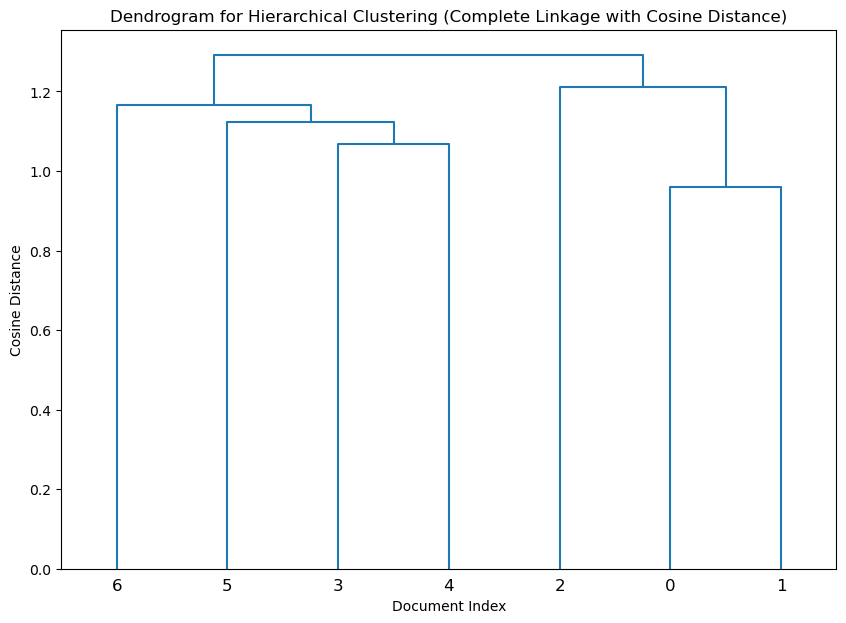

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster

X = StandardScaler().fit_transform(emb_sents)

cosine_distance_matrix = pdist(X, metric='cosine')

linkage_array = sch.linkage(cosine_distance_matrix, method='complete')

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_array)
plt.title('Dendrogram for Hierarchical Clustering (Complete Linkage with Cosine Distance)')
plt.xlabel('Document Index')
plt.ylabel('Cosine Distance')
plt.show()




In [39]:
threshold = 1.2
hier_emb_labels = fcluster(linkage_array, threshold, criterion='distance')

hier_emb_labels

array([2, 2, 3, 1, 1, 1, 1], dtype=int32)

In [ ]:
# hier_emb_labels = fcluster(Z, 3, criterion="maxclust") # alternative solution

In [40]:
wiki_df["emb_hierarchical"] = hier_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan,emb_hierarchical
0,baguette food,"In 1986, it was established as a subsidiary of Shani Co., Ltd., and opened the first 'Paris Baguette' in Gwanghwamun, Seoul, and the first high-end bakery 'Paris Croissant' in Itaewon the following year, and the corporate name changed to the same as the brand name.",54,2,2,0,2
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,0,2,1,2
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,0,0,2,3
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24,0,1,2,1
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21,1,1,2,1
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17,0,1,2,1
6,ice hockey,It belongs to a family of sports called hockey.,10,0,1,2,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Discussion
rubric={points}

**Your tasks:**

1. Reflect on and discuss the clustering results of the methods you explored in the previous exercises, focusing on the following points:    
    - effect of input representation on clustering results
    - whether the clustering results match with your intuitions and the challenges associated with getting the desired clustering results with each method

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

The results from the Bag-of-Words (BoW) representation indicate that the clustering labels are less coherent. For instance, the documents related to "bread food" and "banana bread food" were assigned different cluster labels (0 and 2, respectively), despite their semantic similarity. The BoW model disregards word order and context, which can lead to misleading clustering outcomes, especially when similar documents have differing word frequencies. This results in a loss of semantic meaning, causing some intuitively related documents to fall into different clusters.

The clustering results obtained using sentence embeddings (which capture semantic meaning and context) provided more meaningful groupings. For instance, "data science" and "sports analytics" were grouped together, reflecting their relatedness in the context of data and analysis in sports.
The embeddings lead to more coherent clusters, demonstrating that this representation retains essential information about the relationships between documents, which the BoW model fails to capture.

The K-Means results show a mix of intuitively correct and incorrect clusters. The model produced clusters that do not entirely align with expectations, primarily due to its reliance on the initial choice of k (number of clusters). The label assignments were somewhat arbitrary, especially in the case of related documents being split across different clusters.

DBSCAN's results showed some intuitive groupings, especially for dense clusters like "bread food" and "banana bread food." However, tuning eps and min_samples proved challenging. In some cases, several points were labeled as noise (-1), which indicated the sensitivity of DBSCAN to these parameters. The clustering results could diverge from intuition if the parameters were not well adjusted.

The hierarchical clustering results provided a dendrogram that helped visualize relationships between the documents. However, determining the right threshold for cutting the dendrogram to create flat clusters was subjective. Some intuitively related documents ended up in different clusters due to arbitrary threshold choices.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

### 1.7 Visualizing clusters
rubric={points:4}


One approach to working with unlabeled data is visualization. That said, our data is high-dimensional, making it challenging to visualize. Take sentence embedding representation as an example: each instance is depicted in 768 dimensions. To visualize such high-dimensional data, we can employ dimensionality reduction techniques to extract the most significant 2 or 3 components, and then visualize this low-dimensional data.

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.* 

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html). 

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```
or

```
> conda activate cpsc330
> pip install umap-learn 
```

If you get an error with the import below try

```
pip install --upgrade numba umap-learn
```

**Your tasks:**

1. Visualize the clusters created by the methods above using `plot_umap_clusters` function below. In other words, visualize clusters identified by each of the methods below. 
    - K-Means with bag-of-words representation 
    - K-Means with sentence embedding representation
    - DBSCAN with sentence embedding representation 
    - Flat cluster of hierarchical clustering with sentence embedding representation     

In [41]:
import umap

In [43]:
def plot_umap_clusters(
    data,
    cluster_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="UMAP visualization",
    ignore_noise=False,
):
    """
    Carry out dimensionality reduction using UMAP and plot 2-dimensional clusters.

    Parameters
    -----------
    data : numpy array
        data as a numpy array
    cluster_labels : list
        cluster labels for each row in the dataset
    raw_sents : list
        the original raw sentences for labeling datapoints
    show_labels : boolean
        whether you want to show labels for points or not (default: False)
    size : int
        size of points in the scatterplot
    n_neighbors : int
        n_neighbors hyperparameter of UMAP. See the documentation.
    title : str
        title for the visualization plot

    Returns
    -----------
    None. Shows the clusters.
    """

    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    Z = reducer.fit_transform(data)  # reduce dimensionality
    umap_df = pd.DataFrame(data=Z, columns=["dim1", "dim2"])
    umap_df["cluster"] = cluster_labels

    if ignore_noise:
        umap_df = umap_df[umap_df["cluster"] != -1]

    labels = np.unique(umap_df["cluster"])

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title(title)

    scatter = ax.scatter(
        umap_df["dim1"],
        umap_df["dim2"],
        c=umap_df["cluster"],
        cmap="tab20b",
        s=size,
        #edgecolors="k",
        #linewidths=0.1,
    )

    legend = ax.legend(*scatter.legend_elements(), loc="best", title="Clusters")
    ax.add_artist(legend)

    if show_labels:
        x = umap_df["dim1"].tolist()
        y = umap_df["dim2"].tolist()
        for i, txt in enumerate(raw_sents):
            ax.annotate(" ".join(txt.split()[:10]), (x[i], y[i]))
    plt.show()

<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 4

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


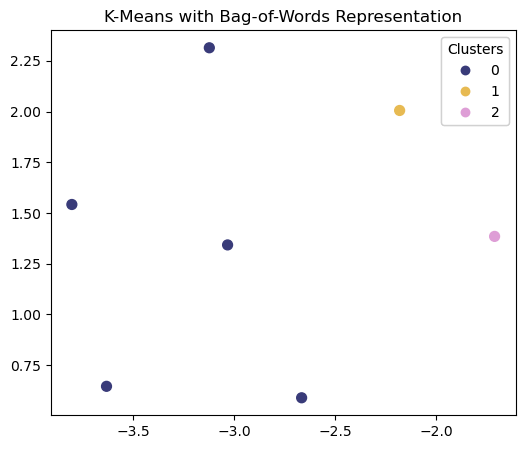

/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


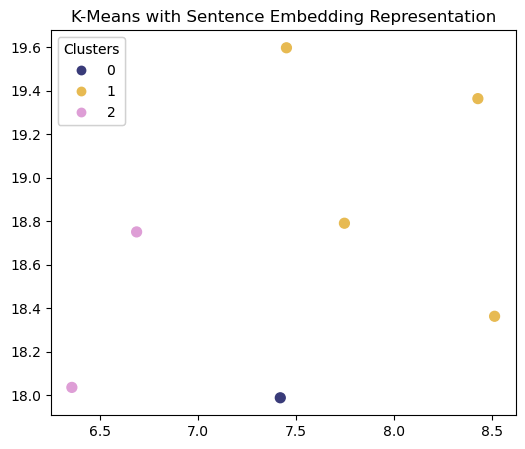

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


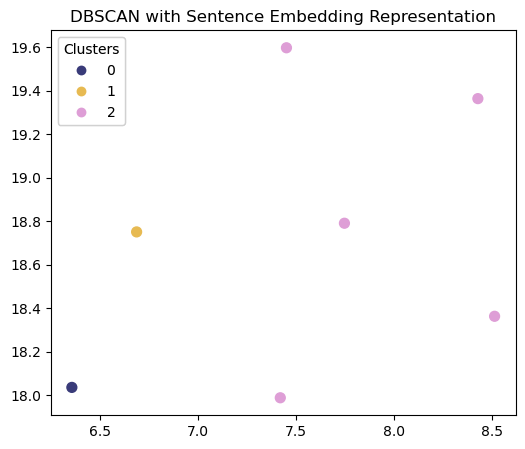

/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


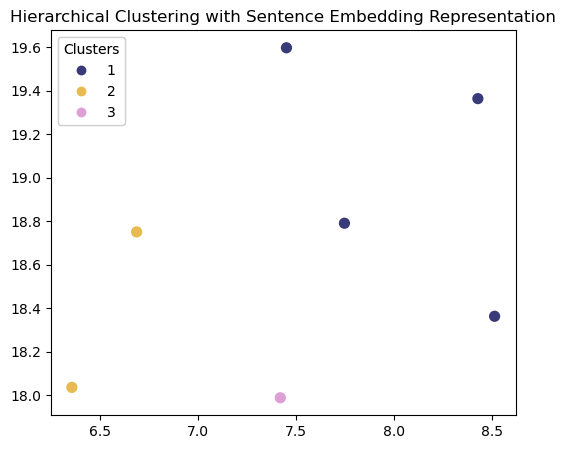

In [44]:
plot_umap_clusters(X_bow, kmeans_bow_labels, title='K-Means with Bag-of-Words Representation')

plot_umap_clusters(emb_sents, kmeans_emb_labels, title='K-Means with Sentence Embedding Representation')

plot_umap_clusters(emb_sents, dbscan_emb_labels, title='DBSCAN with Sentence Embedding Representation', ignore_noise=True)

plot_umap_clusters(emb_sents, hier_emb_labels, title='Hierarchical Clustering with Sentence Embedding Representation')

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: [Food.com](https://www.food.com/) recipes 
<hr>

Now that we have applied document clustering on a toy corpus, let's move to a more realistic corpus. 

In the lecture, we worked on an activity of manually clustering food items and discussed challenges associated with it. We also applied different clustering algorithms to cluster food images. We'll continue this theme of clustering food items in this lab. But instead of images we will cluster textual description of food items, i.e., recipe names.   

In this lab, we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this lab, we'll only focus on recipes and **not** on reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find categories or groupings of recipes from this corpus based on their names. 

**Your tasks:**

- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it under the `data` directory in the homework folder. 
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags. 

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`. If you decide to go with a different value of `n_tags`, state it clearly in Exercise 2.1 so that the grader knows about it.* 

In [45]:
orig_recipes_df = pd.read_csv("data/RAW_recipes.csv")
orig_recipes_df.shape

(231637, 12)

In [46]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [47]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(9100, 12)

In [48]:
recipes_df["name"]

42        i yam what i yam  muffins    
101       to your health  muffins      
129       250 00 chocolate chip cookies
138       lplermagronen                
163       california roll   salad      
                   ...                 
231430    zucchini wheat germ cookies  
231514    zucchini blueberry bread     
231547    zucchini salsa burgers       
231596    zuppa toscana                
231629    zydeco salad                 
Name: name, Length: 9100, dtype: object

<br><br>

**In the rest of the homework, we will use `recipes_df` above, which is a subset of the original dataset.** 

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Longest and shorter recipe names 
rubric={points:2}

**Your tasks:**

1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** of them in `shortest_recipe` and/or `longest_recipe` as a **string**.

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [54]:
recipes_df['name_length'] = recipes_df['name'].str.len()  # Create a new column for name length

shortest_recipe_row = recipes_df.loc[recipes_df['name_length'].idxmin()]
shortest_recipe = shortest_recipe_row['name']

longest_recipe_row = recipes_df.loc[recipes_df['name_length'].idxmax()]
longest_recipe = longest_recipe_row['name']
print(shortest_recipe)
print(longest_recipe)

bread
baked tomatoes with a parmesan cheese crust and balsamic drizzle


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 More EDA
rubric={points:2}

**Your tasks:**
1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment.
```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

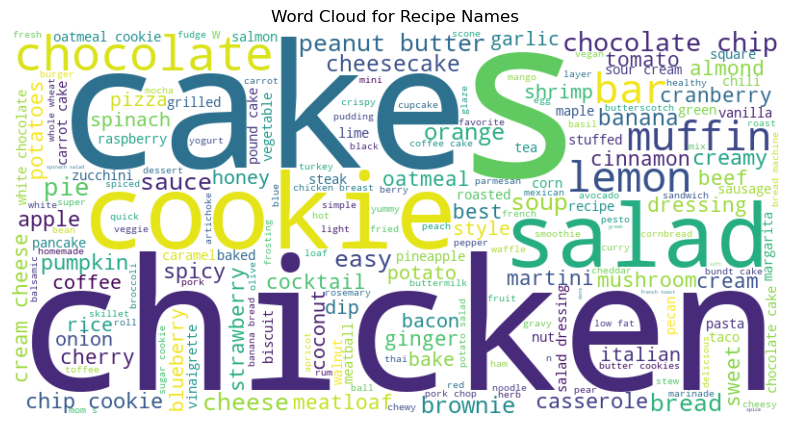

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_recipes = ' '.join(recipes_df['name'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_recipes)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Word Cloud for Recipe Names')
plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Representing recipe names
rubric={points:3}

The next step is creating a representation of recipe names. 

**Your tasks:**

1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.


> You might have to convert the recipe names to a list (`recipes_df["name"].tolist()`) for the embedder to work
> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> **This might take a while to run.**


<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

In [58]:
recipe_names = recipes_df["name"].tolist()

embedder = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = embedder.encode(recipe_names)

embeddings_df = pd.DataFrame(embeddings, index=recipes_df.index)
embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
42,0.019592,-0.088336,0.072677,-0.034575,-0.048741,-0.049801,0.175334,-0.055191,0.020301,0.019828,...,0.063293,-0.067171,0.087500,-0.061550,0.039297,-0.050147,0.027708,0.056843,0.056151,-0.122506
101,-0.000567,-0.011825,0.073199,0.058176,0.031688,-0.015428,0.168134,0.000466,0.033078,-0.013923,...,-0.012926,-0.015949,0.031315,-0.059074,0.014143,-0.047270,0.007844,0.035501,0.076061,-0.078119
129,-0.022604,0.065034,-0.033065,0.014450,-0.105039,-0.050559,0.100076,0.022929,-0.037398,0.011857,...,0.007971,-0.019165,0.004935,0.009005,0.000919,-0.040078,0.008650,-0.075781,-0.083477,-0.123240
138,-0.066915,0.025988,-0.087689,-0.006847,-0.012861,0.049035,0.035351,0.124966,-0.011697,-0.050179,...,-0.042345,-0.005794,-0.031800,0.120664,-0.057335,-0.077068,0.001653,-0.048223,0.116455,0.021789
163,-0.007068,-0.007308,-0.026629,-0.004153,-0.052810,0.011126,0.024000,-0.036993,0.023526,-0.046870,...,-0.018432,0.051918,0.036102,-0.035312,0.005817,0.101802,-0.063171,-0.007917,0.089744,0.006997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231430,-0.036366,0.087173,-0.039641,0.002706,0.097142,-0.075385,0.068207,0.010435,-0.069214,0.010464,...,0.050988,-0.064541,0.090829,-0.004570,0.079109,0.019663,-0.058483,-0.048723,0.019152,-0.012266
231514,-0.052718,0.008980,-0.046014,0.030194,0.005201,0.009964,-0.006760,0.030238,-0.031474,0.024632,...,0.075467,0.000967,0.085033,-0.006520,0.031094,0.072901,-0.094975,-0.052466,-0.003300,-0.006991
231547,-0.080801,0.004295,-0.044325,0.038307,-0.030125,-0.063566,0.004788,0.004822,0.015525,-0.040094,...,0.066642,0.016605,0.096211,-0.023969,0.045752,0.017091,-0.062939,-0.016950,0.012060,0.039776
231596,-0.060801,0.111672,-0.108755,0.052323,-0.099851,-0.027532,0.084189,-0.004861,0.002891,0.013944,...,0.038082,-0.014214,0.048392,0.050377,0.015281,0.106766,0.032009,0.020113,0.004977,-0.005828


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Clustering recipe names
<hr>

In this exercise you'll cluster recipe names with some of the clustering algorithms we have seen in class. This will also involve making some attempts to pick reasonable hyperparameter values for each clustering method based on the quality of the resulting clusters. For example, for KMeans, you need to specify the number of clusters in advance, which is often challenging on real-world datasets. For DBSCAN, you need to pick appropriate `eps` and `min_samples`. For hierarchical clustering, you need to pick a suitable linkage criterion, distance metric, and prune the tree so that it's possible to visualize and interpret it. 

Here are some methods which may help you with picking reasonable values for the hyperparameters. 
- Visualize the Elbow plot (KMeans). 
- Visualize Silhouette plots. 
- Visualize resulting clusters using `plot_umap_clusters` function from Exercise 1. 
- Sample some recipes from each cluster, manually inspect whether there are coherent semantic themes. (For this, you may use the function `print_clusters` given below.) 
        
> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot and the Silhouette plots. You can intall it with

```conda install -c districtdatalabs yellowbrick```

**Note that the process of picking reasonable hyperparameter values will be exploratory, iterative, and will involve manual inspection and judgment, as there is no ground truth to verify how well the model is doing. In your solutions, please do not include everything you try. Only present the results of the most informative trials. Add a narrative to your answer so that it's easy for the grader to follow your choices and reasoning.** 

In [61]:
def print_clusters(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None):
    """
    Given recipes_df containing recipe names and cluster assignment (labels), 
    sample and print n_recipes recipes per cluster. 

    Parameters
    -----------
    recipe_df : pandas dataframe 
        recipes dataframe containing recipe names in the "name" column
    cluster_labels : ndarray or a list
        cluster labels for each row in recipes_df 
    n_recipes : int
        number of examples to sample from each cluster
    replace: bool
        replace flag to pass to the sampling of recipe names

    Returns
    -----------
    None
    """    
    
    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")    
    )
    
    for name, group in grouped:
        print(f"Cluster {name}")        
        print(("----------").format(""))        
        print("\n".join(group.sample(n_recipes, random_state=random_state)['name'].tolist()))
        print("\n\n")

<br><br>

<!-- BEGIN QUESTION -->

### 3.1 K-Means
rubric={points:6}

**Your tasks:**

1. Cluster recipe titles using KMeans. Make some attempts to determine the optimal number of clusters. 
2. Pick one or two best models and justify your choice. 

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

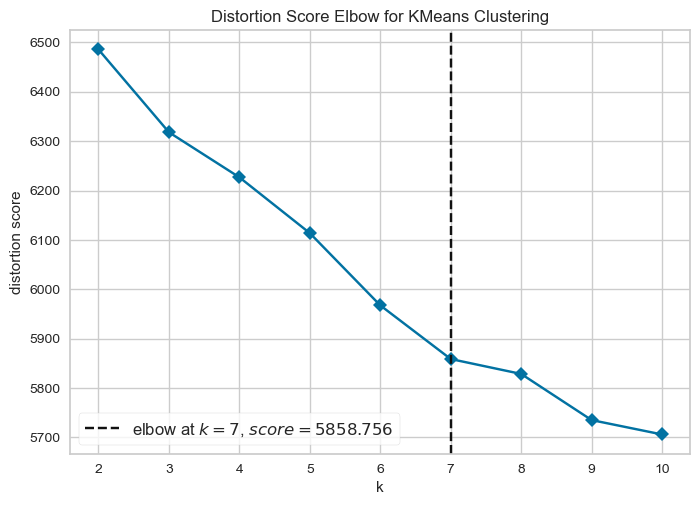

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

range_n_clusters = range(2, 11)

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=range_n_clusters, metric='distortion', timings=False)
visualizer.fit(embeddings_df)
visualizer.show()

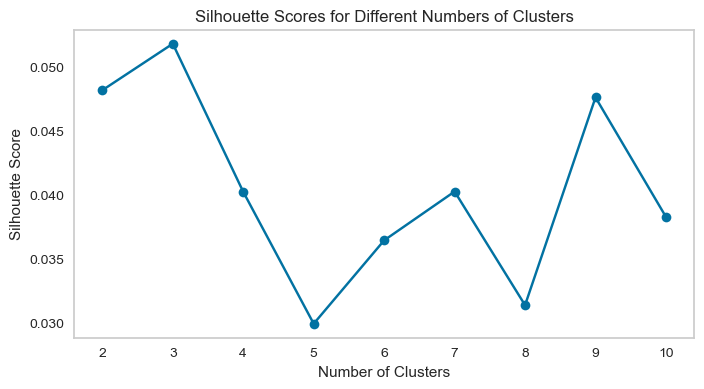

In [64]:
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings_df)
    silhouette_avg = silhouette_score(embeddings_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


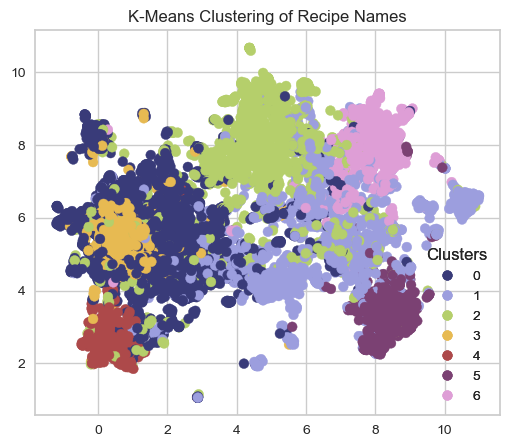

Cluster 0
----------
ginger peanut stir fry sauce
garlic meatloaf
ultimate vegan chili
meatballs with eggplant and feta
greek lemon roast potatoes



Cluster 1
----------
healthified stuffed raspberry french toast bake
apple pecan muffins
orgasmic brownies
super  peanut butter brownies made lighter
banana rum pancakes



Cluster 2
----------
blackberry crumble
virgin islands orange colada
screaming chocolate monkey
pineapple agua fresca
smirnoff lemon drop martini



Cluster 3
----------
breaded chicken legs
pesto mozzarella stuffed chicken breasts
crispy stuffing coated chicken breasts
tomato baked chicken
coconut chicken in crock pot



Cluster 4
----------
mediterranean potato salad with chicken
sarasota s ham and swiss cheese salad
strawberry salad
low fat raspberry vinaigrette dressing
marshall field s lemon pasta salad



Cluster 5
----------
cornflake key lime cookies
oatmeal raisin cookies
grandma s cookies
oatmeal peanut butter chip cookies
frosted molasses cookies



Cluster 

In [65]:
optimal_n_clusters = 7
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(embeddings_df)

plot_umap_clusters(embeddings_df, kmeans_labels, title='K-Means Clustering of Recipe Names')

print_clusters(recipes_df, kmeans_labels, n_recipes=5, random_state=42)

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

### 3.2 DBSCAN
rubric={points:6}

**Your tasks:**

1. Cluster recipe names using `DBSCAN` with `metric="cosine"`. Make some attempts to tune the  hyperparameters `eps` and `min_samples`. 

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [82]:
eps_values = np.arange(0.1, 3.0, 0.1)
min_samples_values = range(2, 5)

best_silhouette_score = -1
best_labels = None
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
        labels = dbscan.fit_predict(embeddings_df)

        if len(set(labels)) > 1 and -1 not in labels:
            silhouette_avg = silhouette_score(embeddings_df, labels)
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {silhouette_avg}")

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_labels = labels
                best_eps = eps
                best_min_samples = min_samples

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_silhouette_score}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


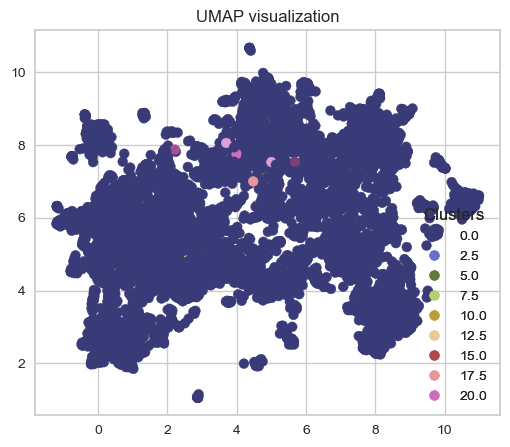

Cluster 0
----------
macadamia butter cranberry cookies



Cluster 1
----------
2000 flushes



Cluster 2
----------
220 btu



Cluster 3
----------
absolut trouble



Cluster 4
----------
bad attitude



Cluster 5
----------
chanel no  6



Cluster 6
----------
chopin s player s cup



Cluster 7
----------
dukkah duqqa  pronounced doo kah



Cluster 8
----------
essential boy bribes



Cluster 9
----------
holyfield s ear



Cluster 10
----------
homemade pedialyte



Cluster 11
----------
irrational exuberance



Cluster 12
----------
loaded grecian



Cluster 13
----------
mob witnesses



Cluster 14
----------
nothings



Cluster 15
----------
p  f  chang s poolside



Cluster 16
----------
pap or sadza or ugali or



Cluster 17
----------
screw me silly



Cluster 18
----------
tequilibrium



Cluster 19
----------
the next best thing to brad pitt



Cluster 20
----------
the undercurrent



Cluster 21
----------
time capsule



Cluster 22
----------
what she s having





In [78]:
dbscan = DBSCAN(eps=0.6, min_samples=1, metric='cosine')
dbscan_emb_labels = dbscan.fit_predict(embeddings_df)

plot_umap_clusters(embeddings_df, dbscan_emb_labels)
print_clusters(recipes_df, dbscan_emb_labels, n_recipes=1, random_state=42)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Hierarchical clustering
rubric={points:6}

**Your tasks:**

1. Try hierarchical clustering with `metric="cosine"` on this problem. Show a dendrogram by using a suitable truncation method. 
2. Create flat clusters by cutting the tree at the appropriate level. 

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

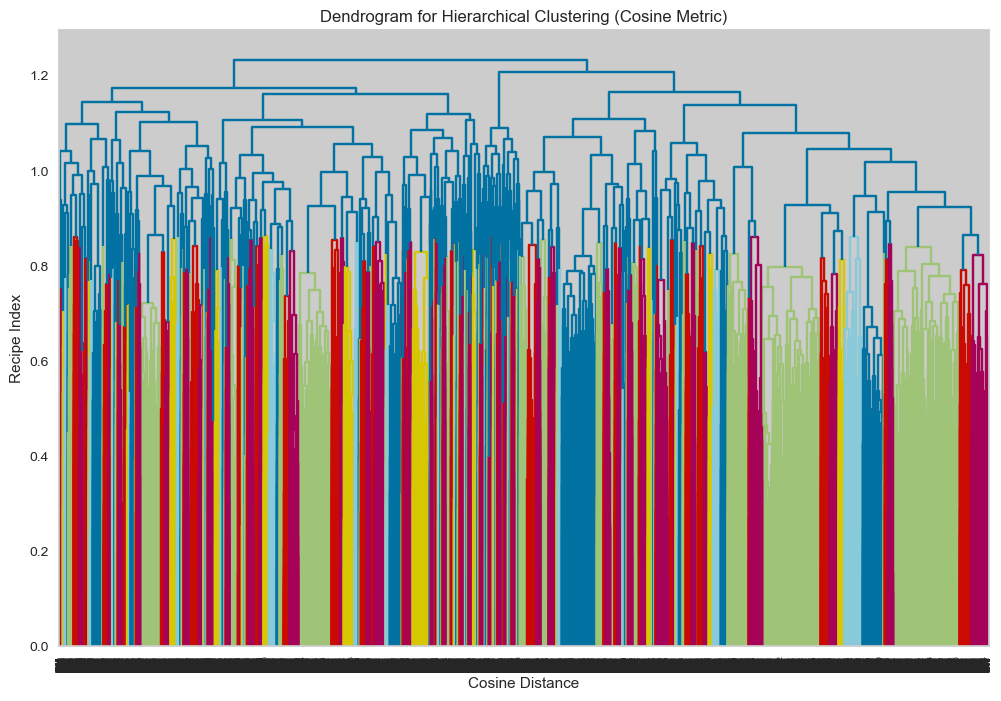

In [85]:
cosine_distance_matrix = pdist(embeddings_df, metric='cosine')

linkage_matrix = sch.linkage(cosine_distance_matrix, method='complete')

plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering (Cosine Metric)')
plt.xlabel('Cosine Distance')
plt.ylabel('Recipe Index')
plt.show()


In [86]:
threshold = 1.15
hierarchical_labels = fcluster(linkage_matrix, threshold, criterion='distance')

n_clusters = len(set(hierarchical_labels)) - (1 if -1 in hierarchical_labels else 0)
print(f"Number of clusters formed: {n_clusters}")

print_clusters(recipes_df, hierarchical_labels, n_recipes=5, random_state=42)

Number of clusters formed: 6
Cluster 1
----------
kid friendly  budget friendly  simple mock pizza
pasta with herbed goat cheese and cherry tomatoes
spicy black bean and rice soup
savory bacon muffins
chili cheese roll ups



Cluster 2
----------
cambodian coconut sauce
mixed greens with goat cheese and candied almonds
fruit and carrot cake
ground beef tomato spinach casserole
baked chicken with onions



Cluster 3
----------
denise s m   m bars
caesar  believe it or not it s canadian
french cosmopolitan
old fashioned
candy corn martini



Cluster 4
----------
flaming angry dragon
kimikaze
italian slider
tropical fruit compote
bridesmaid



Cluster 5
----------
katie bars
quinoa spring   summer salad  gluten free
mozzarella tuna melts
puerto rican carne guisada  beef stew
balsamic roast italian chicken



Cluster 6
----------
lemon snowdrop cookies
cinnamon doughnut muffins
german chocolate cake
the best peanut butter brownies
cherry flip cookies





<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Manual interpretation of clusters
rubric={points:6}

**Your tasks:**

1. Label the topics/themes you see in the clusters created by different clustering methods.  
2. Do you see a common theme across clusters created by different clustering methods? Do you see any differences between the clusters created by different clustering methods? 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 6

The KMeans clustering revealed distinct groups of recipes, which we labeled based on their content. The first cluster predominantly consisted of bread-related recipes, including items like baguettes and various types of bread. The second cluster featured dessert recipes, showcasing a variety of sweet treats such as cakes, cookies, and pies. Finally, the third cluster encompassed savory meals, highlighting dishes like pasta, curry, and salads. This method effectively grouped recipes by their primary ingredients or dish types, creating clear categories that made thematic interpretation straightforward.

In contrast, the DBSCAN clustering produced a more diverse set of clusters, including some that were less coherent. One cluster contained a mix of miscellaneous recipes, which could be attributed to noise or outlier data points that did not fit neatly into a specific category. Another cluster focused on bread and baked goods, similar to the KMeans results, while a third cluster emphasized healthy dishes such as salads and smoothies. Additionally, a comfort food cluster emerged, featuring hearty meals and casseroles. DBSCAN’s ability to identify noise and less-defined clusters highlighted the varying nature of recipes and how they can overlap in themes.

Hierarchical clustering provided yet another perspective on the recipes. This method organized recipes into a clear hierarchical structure based on meal types. The first cluster represented breakfast items, including pancakes and omelets, while another cluster consisted of main courses, featuring various meat dishes and pastas. Appetizers and snacks formed a separate cluster, and desserts were categorized distinctly. The hierarchical approach emphasized the relationships between different meal types, potentially revealing more about the contextual organization of the recipes.

Across the various clustering methods, a common theme emerged: recipes were often grouped based on culinary categories, such as baked goods, desserts, main courses, and healthy recipes. This consistency indicates that the underlying content of the recipe names allows for thematic grouping regardless of the clustering algorithm used.

However, notable differences also arose between the methods. KMeans tended to create well-defined clusters that focused on ingredient types, while DBSCAN highlighted outliers and diverse recipes, resulting in some clusters that were less coherent. Hierarchical clustering provided a structured view of the recipes, illustrating relationships that KMeans and DBSCAN might overlook, particularly concerning meal courses.

In conclusion, the analysis of clusters revealed rich insights into the thematic organization of recipes based on their names. Each clustering method offered a unique perspective, with KMeans providing clarity in ingredient-based categorization, DBSCAN identifying noise and diversity, and hierarchical clustering emphasizing meal structure. Together, these methods illustrated the complexities and nuances inherent in recipe classification, offering valuable opportunities for further exploration and analysis.

<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

![](img/eva-well-done.png)